In [1]:
# 用KNN做分类，引入：
from sklearn.neighbors import KNeighborsClassifier
# 用KNN做回归，引入：
from sklearn.neighbors import KNeighborsRegressor
# 构造函数
KNeighborsClassifier(n_neighbors=5, weights=‘uniform’, algorithm=‘auto’, leaf_size=30)

SyntaxError: invalid character in identifier (<ipython-input-1-8bdab63b9244>, line 6)

## 如何用KNN对手写数字进行识别

In [3]:
# 加载数据
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(data.shape)

(1797, 64)


In [9]:
print(digits.target)
print(digits.target_names)

[0 1 2 ... 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
# 查看第一副图像
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [12]:
print(digits.target[0])

0


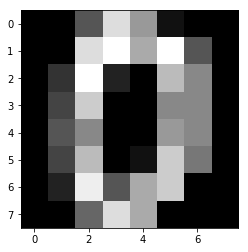

In [14]:
# 将第一幅图像显示出来
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(digits.images[0])
plt.show()

In [19]:
# 分割数据，将25%的数据作为训练集，其余作为测试集
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)
# 采用Z-score规范化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)
# 初始化KNN分类器，进行训练、拟合，并预测
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
test_predict = knn.predict(test_x)
from sklearn.metrics import accuracy_score
print('KNN准确率：%.4lf' % accuracy_score(test_y, test_predict))

KNN准确率：0.9756
